In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 결측 데이터 확인

In [2]:
data = {'eng': [10, 30, 50, 70],
       'kor': [20, None, None, 80],
       'math': [90, 50, 20, 70]}
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd'])
df

,eng,kor,math
a,10,20.0,90
b,30,NaN,50
c,50,NaN,20
d,70,80.0,70


In [3]:
# 결측치 확인
df.isna()

,eng,kor,math
a,False,False,False
b,False,True,False
c,False,True,False
d,False,False,False


In [5]:
# 결측치 개수 확인
df.isna().sum()

eng     0
kor     2
math    0
dtype: int64

In [6]:
# 결측치 아닌 데이터 확인
df.notna()

,eng,kor,math
a,True,True,True
b,True,False,True
c,True,False,True
d,True,True,True


In [8]:
# 결측치 아닌 데이터 개수
df.notna().sum()

eng     4
kor     2
math    4
dtype: int64

In [9]:
# 결측치가 하나도 없는 행
df.value_counts()

eng  kor   math
70   80.0  70      1
10   20.0  90      1
dtype: int64

In [12]:
# missingno 설치
!pip install missingno

In [13]:
import missingno as mg

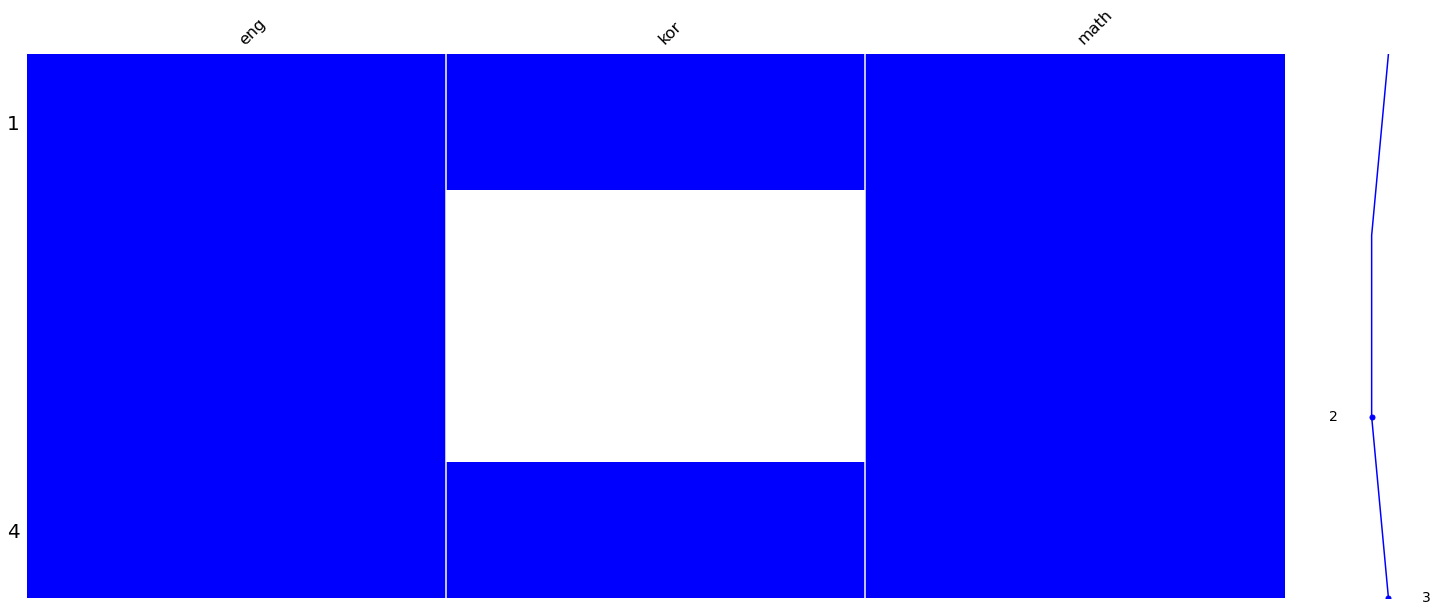

In [14]:
# 결측 데이터 시각화 -> 결측치인 부분 흰색, 결측치가 아닌 부분 파란색으로 그려진다.
mg.matrix(df, color=(0, 0, 1)) # 데이터 프레임, 색 지정
plt.show()

### 결측 데이터 생성

In [16]:
df

,eng,kor,math
a,10,20.0,90
b,30,NaN,50
c,50,NaN,20
d,70,80.0,70


In [22]:
# 'eng'컬럼의 'a', 'b'행 값을 결측치로 수정 
# 결측치를 생성 수정할 때 np.nan을 사용한다.
df['eng'].loc['a':'b'] = np.nan
df

,eng,kor,math
a,NaN,20.0,90
b,NaN,NaN,50
c,50.0,NaN,20
d,70.0,80.0,70


### 결측치 특정값 채우기

In [42]:
# 특정값으로 채우기
# 결과값 반영하려면 변수로 받거나 inplace=True
df.fillna(1)

,eng,kor,math
a,1.0,20.0,90
b,1.0,1.0,50
c,50.0,1.0,20
d,70.0,80.0,70


In [37]:
# 결측치 전의 값으로 채우기
df.fillna(method='ffill')

,eng,kor,math
a,NaN,20.0,90
b,NaN,20.0,50
c,50.0,20.0,20
d,70.0,80.0,70


In [39]:
# 결측치 후의 값으로 채우기
df.fillna(method='bfill')

,eng,kor,math
a,50.0,20.0,90
b,50.0,80.0,50
c,50.0,80.0,20
d,70.0,80.0,70


In [24]:
# 특정 컬럼 결측치 처리
df['eng'].fillna(2)

a     2.0
b     2.0
c    50.0
d    70.0
Name: eng, dtype: float64

### 결측치 삭제

In [32]:
# 결측치 있는 행 삭제
# 결과값 반영하려면 변수로 받거나 inplace=True
df.dropna()

,eng,kor,math
d,70.0,80.0,70


In [33]:
# 결측치 있는 열 삭제
df.dropna(axis=1)

,math
a,90
b,50
c,20
d,70


In [34]:
# 특정 열에 결측치 찾아 해당 행 삭제
df.dropna(subset=['eng'])

,eng,kor,math
c,50.0,NaN,20
d,70.0,80.0,70


In [35]:
# 특정 행에 결측치 찾아 해당 열 삭제
df.dropna(subset=['a'], axis=1)

,kor,math
a,20.0,90
b,NaN,50
c,NaN,20
d,80.0,70
